In [1]:
from ga.ga import Individual, GeneticAlgorithm
from ga.mutation import mutate_one_gene, mutate_one_bit
import numpy
from lib.utils import rand_stochastic_vector



generation 0 of 20
generation 1 of 20
generation 2 of 20
generation 3 of 20
generation 4 of 20
generation 5 of 20
generation 6 of 20
generation 7 of 20
generation 8 of 20
generation 9 of 20
generation 10 of 20
generation 11 of 20
generation 12 of 20
generation 13 of 20
generation 14 of 20
generation 15 of 20
generation 16 of 20
generation 17 of 20
generation 18 of 20
generation 19 of 20
[-108.849842527996, -107.85246052091621, -107.85246052091621, -107.85246052091621, -107.85246052091621, -107.32199281238147, -107.32199281238147, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648, -105.60892930268648]


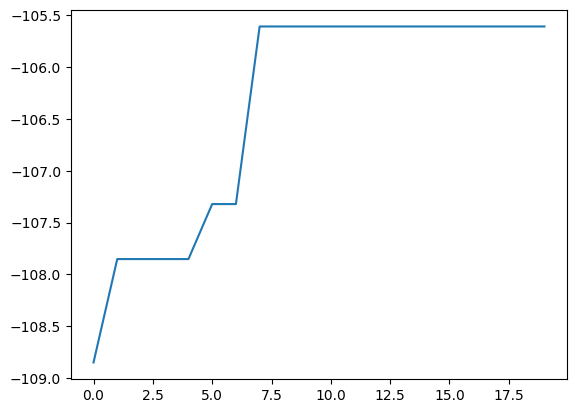

In [11]:
alphabet = list('abcdefghi')
n_states = 6
population_size = 10
n_generations = 20


initial_population = [Individual(n_states, alphabet) for i in range(population_size)]


parent = Individual(n_states, alphabet)
parent_hmm = parent.to_hmm()
# print(parent_hmm)
n_samples, len_samples = 1, 50
samples = parent_hmm.sample(n_samples, len_samples)

def fitness_func(individual, ga_instance):
    # Wichtig!!! Da keine end_states spezifiziert wurden MUSS der zweite Parameter gesetzt werden. Sonst endlos loop
    

    child_hmm = individual.to_hmm()

    total_score = [child_hmm.log_probability(sample) for sample in samples]
    mean_score = sum(total_score)/len(samples)
    return mean_score


def parent_selection_func(population, parent_count, ga_instance):
    parents = []

    for i in range(parent_count):
        parent_1 = population[i % len(population)]
        parent_2 = population[(i+1) % len(population)]
        parents.append([parent_1, parent_2])

    return parents


    # select every element
    # do one random mudadjion

    # exchange one gene for a random gene

def crossover_func(parents, ga_instance):
    parent_1, parent_2 = parents 

    random_split_point = numpy.random

    random_split_point = numpy.random.choice(range(len(parent_1.genes)))

    child_genes = parent_1.genes[:random_split_point] + parent_2.genes[random_split_point:]
    return Individual(n_states, alphabet, child_genes)


mutation_func = mutate_one_gene
    # während noch nicht genug parents selected wurden

ga = GeneticAlgorithm(
    initial_population=initial_population,
    n_generations=n_generations,
    fitness_func=fitness_func,
    parent_select_func=parent_selection_func,
    crossover_func=crossover_func,
    mutation_func=mutation_func
)
res = ga.start()
ga.plot()
# print(res)

# Individual
# - genes
# genes = [[...n], [...n], [...n], [...n]]
# start_probs = genes[0]
# transition_probs = genes[1:n]
# emission_probs = genes[n+1:]
# hmm_from_individual = 
# 

# genetic_algorithm
# - initial population
# - fitness function
# - mutation function
# def mutation_function(individual, ga_instance)

# - parent selection function

# def parent_selection(population, ga_instance)


# for i in range()